<h1>HighBoost Filtering<h1>

Alunos:<br>
    Vitor Fernandes Gonçalves da Cruz Ra120116 <br> 
    Vitor Rodrigues Gôngora RA106769

<h2>Introdução<h2>

O presente trabalho tem como objetivo receber uma imagem de entrada e aplicar o método  HighBoost Filter através da linguagem de programação python, utilizando o método unsharping mask. Esse método consite em subtrair a imagem suavizada da imagem original. Os passos podem ser descritos da seguinte forma:<br>
1. Blur da imagem original através do filtro da média.
2. Subtração da imagem suavizada com imagem original resultando em uma máscara(g_mask).
3. Multiplicação de um escalar k com g_mask.
4. Soma da imagem original com o passo 3.

Para aplicar a suavização na imagem, é necessário o conceito de convolução, que é o processo de mover uma máscara, ou kernel, pela imagem e calcular a soma do produto ponto a ponto entre a imagem e a máscara rebatida. Uma máscara rebatida é basicamente uma inversão da máscara original, representada por g̅(x, y) = g(-x, -y). Para se ter o high boost filtering precisa-se que k>1

In [241]:
import numpy as np
import  cv2
import matplotlib.pyplot as plt
import os


In [242]:
#Rebate a máscara
def inverse_mask(mask):
    mask = np.flipud(np.fliplr(mask))
    return mask

In [243]:
def average_filter(mask):
    total = np.sum(mask)
    result_mask = mask/total
    return result_mask

In [244]:
def create_mask(n):
    return np.ones((n,n))

In [245]:

def highBoost(image, mask,k,input_user):
    mask_average_filter = average_filter(mask)
    mask = inverse_mask(mask_average_filter) # rebate a mascara

    #Faz a convolução 
    image_blur = cv2.filter2D(image,-1,mask_average_filter,borderType=cv2.BORDER_CONSTANT)

    # Subtração
    g_mask = image.astype(float) - image_blur.astype(float)

    # Multiplicação por um escalar 'k'
    mult = (k * g_mask)

    # Adição
    image_highBoost = image + mult

    # Intervalo adequado
    image_highBoost = np.clip(image_highBoost, 0, 255).astype('uint8')

    cv2.imwrite("Blur_Image_"+input_user,image_blur)
    cv2.imwrite("HighBoost_filter_"+input_user,image_highBoost)
    

    return image_blur, image_highBoost

['pattern.tif', 'dip_xe.tif', 'contact_lens.tif', 'x_ray.tif', 'dollar.tif', 'square.tif', 'moon.tif']


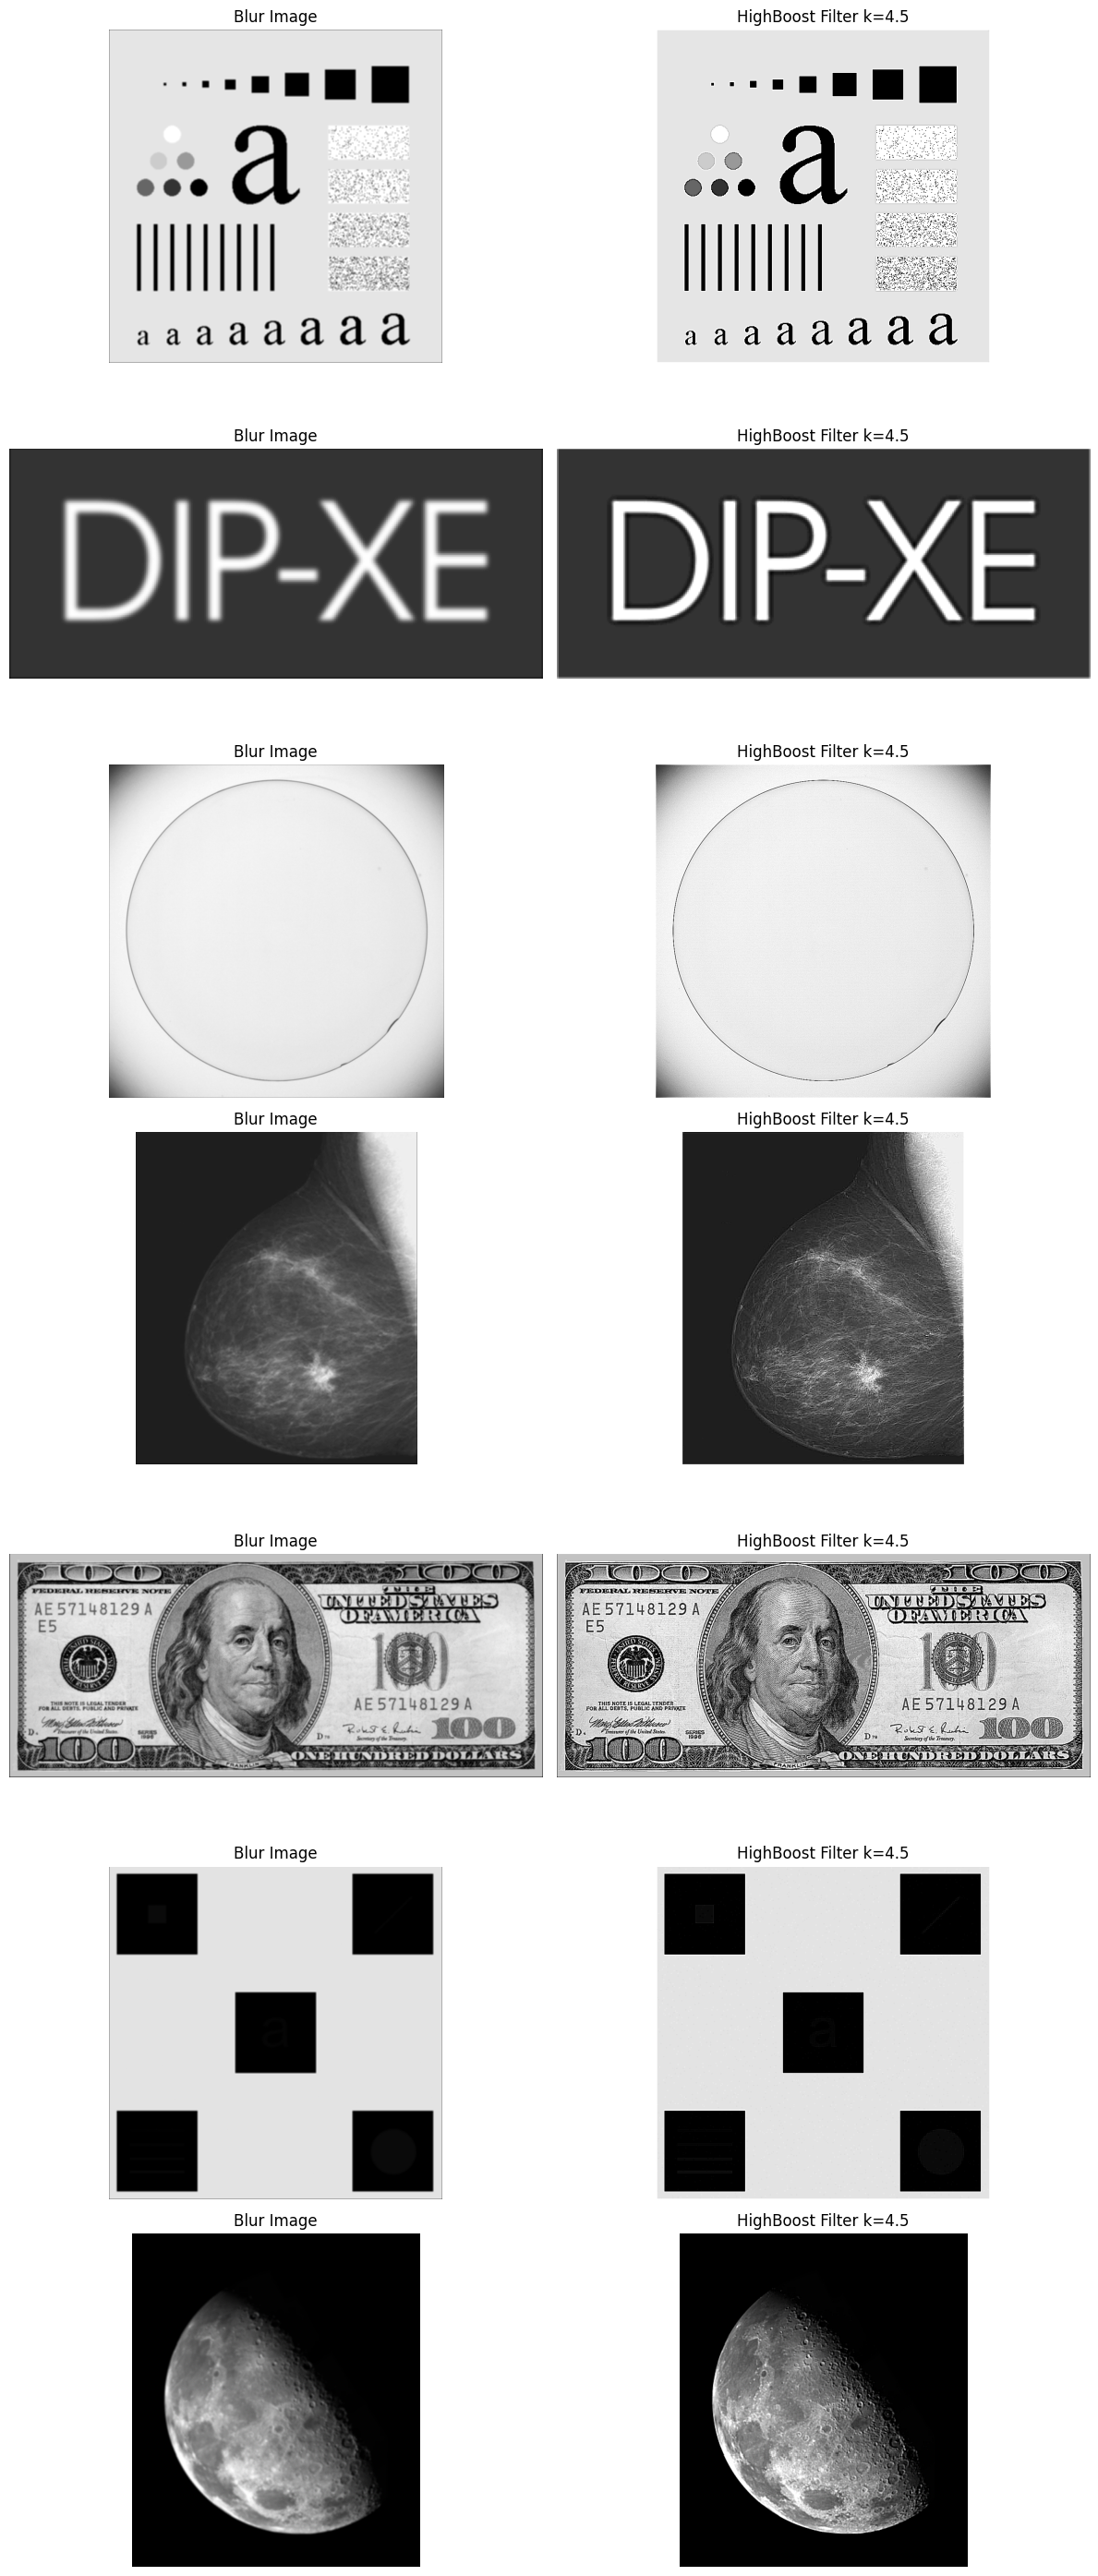

In [246]:
user = (input('Entre com o tamanho da máscara, k:')).split(" ")
n = int(user[0])
k = float(user[1])  
mask = create_mask(n)

images = os.listdir()
images_result = []

#Seelciona as imagens corretas
for file in images:
    if (file!="high_boost ra120116_ra106769.ipynb" and not(file.startswith("Blur_Image_")) and not(file.startswith("HighBoost_filter_")) and 
        file!="ra120116_ra106769_highBoost.zip" and not(file.endswith('.git'))):
        images_result.append(file)
         
fig, axs = plt.subplots(len(images_result), 2, figsize=(12, 4*len(images_result)))

print(images_result)
for i,image_name in enumerate(images_result):
    image  = cv2.imread(image_name,cv2.IMREAD_GRAYSCALE)
    image_blur, image_highBoost = highBoost(image,mask,k,image_name)

    #Plot de todas as imagens
    axs[i, 0].imshow(image_blur, cmap='gray', vmin=0, vmax=255)
    axs[i, 0].set_title('Blur Image')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(image_highBoost, cmap='gray', vmin=0, vmax=255)
    axs[i, 1].set_title('HighBoost Filter k=' + str(k))
    axs[i, 1].axis('off')


plt.tight_layout() 
plt.show()

<h2>Referências<h2>

GONZALEZ, Rafael C.; WOODS, Richard E.. Processamento de Imagens Digitais. 3. ed. São Paulo: Pearson,2007